<a href="https://colab.research.google.com/github/QuratulAin20/Langchain/blob/main/lang_graph_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is LangGraph?
LangGraph is like a toolbox for building smart programs that use AI (like ChatGPT) to do cool things. It helps you create programs where multiple "actors" (think of them as robots or characters) work together to solve problems. These actors can talk to each other, make decisions, and remember what they did before (that's what stateful means).

1. Why using Lang graph?
Teamwork: Just like in a group project, actors can work together to get things done faster.\
Smart Conversations: The actors use something called LLMs (Large Language Models), which are really good at understanding and creating language, like chatting or writing stories.\
Stateful: This means each actor remembers what it was doing. It can keep track of its own progress, just like how you keep notes for your homework.


2. How Does It Work?\
Imagine you have a team of actors:\
One actor might be good at answering questions.\
Another might be great at finding information online.\
They send messages to each other to help complete a task.\
Example\
Think of a school project where:

Actor 1 gathers facts about a topic.\
Actor 2 writes a report using those facts.\
Actor 3 designs a poster based on the report.\
Each actor does its own part but helps each other by sharing what they know!

# Chat bot using LANG GRAPH

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 858.8 kB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.0/413.0 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.33
    Uninstalling langchain-core-0.3.33:
      Successfully uninstalled langchain-core-0.3.33
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.5
    Uninstalling langchain-text-splitters-0.3.5:
      Successfully uninstalled langchain-text-splitters-0.3.5
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.17
    Uninstalling langchain-0.3.17:
      Successfully uninstalled langchain-0.3.17


In [6]:
# setting API key
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
lang_smith_api_key = userdata.get('langsmith_api_key')

In [7]:
import os
os.environ['LANGCHAIN_API_KEY'] = lang_smith_api_key
os.environ['LANGCHAIN_TRACING_V2'] = "true"
os.environ['LANGCHAIN_PROJECT'] = "langgraph-chatbot"

In [8]:
from langchain_groq import ChatGroq

In [11]:
# Defining LLM model
llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7824e3d2e3d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7824e3d42c50>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [14]:
# Building chatbot
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

### 1. **Imports**

```python
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
```

#### a. `from typing import Annotated`
- This import brings in `Annotated`, which is a way to add metadata to type hints in Python. It's often used to provide additional context about the type, like constraints or descriptions.

#### b. `from typing_extensions import TypedDict`
- `TypedDict` allows you to define dictionaries with a specific structure in Python. This means you can specify what keys are required and what types of values they should hold. This is useful for creating more readable and maintainable code.

#### c. `from langgraph.graph import StateGraph, START, END`
- **`StateGraph`**: This is likely a class that represents a graph structure where nodes can represent different states in a workflow or process. It helps manage transitions between these states.
- **`START` and `END`**: These are probably constants representing the starting and ending points of the graph. They help define the boundaries of the process flow.

#### d. `from langgraph.graph.message import add_messages`
- **`add_messages`**: This function is likely used to add messages to the state graph. Messages can be important for communication between actors or for maintaining context in workflows.

### 2. **Understanding the Components**

Now, let’s break down what each component involves conceptually:

#### a. **Annotated**
- When you use `Annotated`, you can add extra information to a type. For example:
  ```python
  MyType = Annotated[int, "This is an integer"]
  ```
  This means `MyType` is an integer, and the annotation provides additional context.

#### b. **TypedDict**
- You can define a specific structure for a dictionary. For example:
  ```python
  class Person(TypedDict):
      name: str
      age: int
  ```
  Here, `Person` is a dictionary that must have a `name` (a string) and an `age` (an integer).

#### c. **StateGraph**
- A state graph organizes states and transitions. Think of it like a flowchart:
  - **Nodes** represent states (like tasks).
  - **Edges** represent transitions (how to move between tasks).
  
#### d. **START and END**
- These constants help define where the process begins and ends in the state graph. They are essential for ensuring that the workflow is clear and manageable.

#### e. **add_messages**
- This function helps manage communication within the state graph. It could be used to log messages, send data between actors, or keep track of actions taken.

### 3. **Putting It All Together**

When you combine these components, you can create a structured way to manage workflows with actors. Here's how they might work together:

- You define data structures using `TypedDict` to ensure clarity in the data you manage.
- You create a `StateGraph` to represent the workflow, using `START` to initiate and `END` to conclude processes.
- You can use `add_messages` to facilitate communication and keep track of what’s happening in the workflow.

### Conclusion

The code snippet sets the stage for building a stateful multi-agent application using LangGraph. Each part contributes to creating a robust structure for managing state and interactions in your application. If you have specific parts you'd like more detail on, feel free to ask!

In [16]:
class State(TypedDict):
  # messages have the type 'list'.The 'add_messages' function in the annotation defines how the state key should be updated
  # in this case it is updated as append into a list not overwrite
  messages:Annotated[list, add_messages]

graph_builder=StateGraph(State)

In [17]:
graph_builder

In [19]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

- After creating the graph builder next we have to create the next node i.e chatbot.
- Remember when ever we are defining the node of the graph it should take State as a parameter so that our state management keep on changing on every interaction.
- next we must return in our messages what ever we are executing
- In short we have this chatbot function that is invoking the previous messages by user and return some messages

In [20]:
# Adding our first node to graph builder
graph_builder.add_node("chatbot", chatbot)

### UPTILL NOW
1. first we create a class state, WHY? In order to manage our state of whole work flow.
2. Next created over graph builder, WHY? This graph builder organizes your states and transitions, allowing you to manage how different parts of your workflow interact with each other. It sets up the framework for adding nodes (like functions or tasks) that represent different states or actions in your process.

3. Finally , define our first node i.e chatbot and its functionality along with what is it returning. Remember this chatbot is inheriting the state class we build on fist step. So that our state will keep on appending.

Sure! Here’s a concise summary of each step:

1. **Creating the State Class**: The `State` class is defined using `TypedDict` to establish a structured format for managing a list of messages in the workflow.

2. **Creating the Graph Builder**: A `graph_builder` instance is created using `StateGraph(State)` to organize states and transitions, facilitating interaction between different components of the workflow.

3. **Defining the Chatbot Node**: The `chatbot` function processes input messages by invoking a language model and returns updated messages, enabling conversation functionality.

4. **Adding the First Node to the Graph Builder**: The `chatbot` function is added as the first node in the `graph_builder`, initiating the conversational flow and allowing for state management of user interactions.

In [21]:
# connecting to graph_builder
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

In [22]:
# compiling our graph
graph= graph_builder.compile()

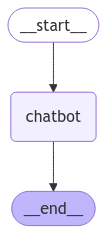

In [23]:
# Dispalying the graph
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [24]:
# Executing

while True:
  user_input= input("User : ")
  if user_input.lower() in ["quit" , "q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user", user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assisstant:", value['messages'].content)

User : hi
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.4e-07, 'queue_time': 0.025528604, 'total_time': 0.027273067}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-e426b56b-305e-4989-9a30-1d1b4d1aaae4-0', usage_metadata={'input_tokens': 10, 'output_tokens': 15, 'total_tokens': 25})}])
content='Hello! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 10, 'total_tokens': 25, 'completion_time': 0.027272727, 'prompt_time': 3.4e-07, 'queue_time': 0.025528604, 'total_time': 0.027273067}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-e426b56b-305e-4989-9a30

# Langgraph chatbot using TOOLS


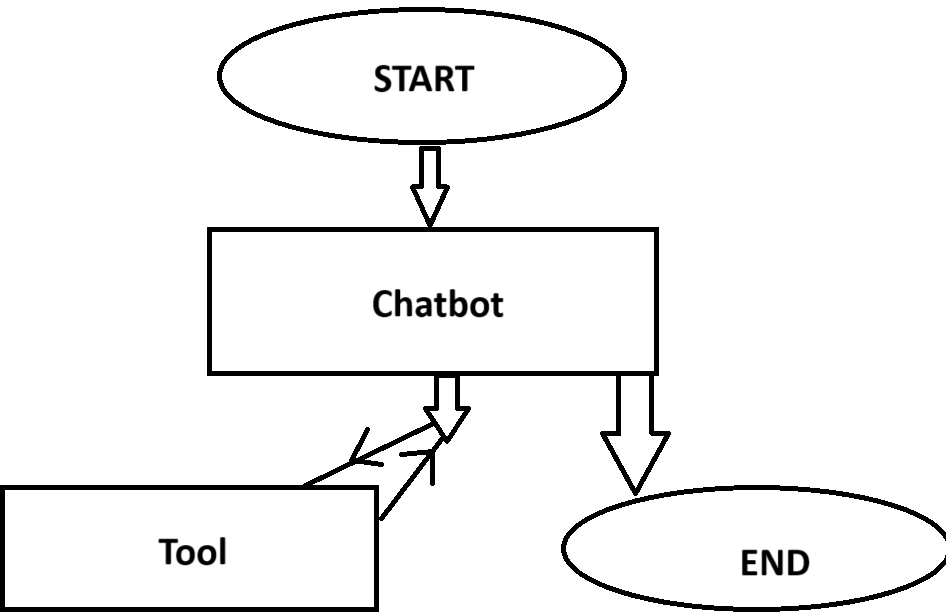

In [25]:
from IPython.display import Image, display

# Display the image
display(Image(filename='/content/chatbot.png'))

In [28]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.2 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=0bf5fbeed3df4e30ea726e6bead8aea6ac898135b584ed147e778511ce900bb5
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=40b316049842105edbc94696e23dd4349d5b6a201bd5a23f973e1238ccfeae35
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built wikipedia sgmllib3k


In [29]:
# working with tools

from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

# creating tools

arxiv_wrapper = ArxivAPIWrapper(top_k_results=1 ,doc_content_chars_max=200)
arxiv_tool = ArxivQueryRun(api_wrapper = arxiv_wrapper)

wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wikipedia_tool = WikipediaQueryRun(api_wrapper=wikipedia_wrapper)

In [30]:
wikipedia_tool.invoke("what is AI")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI), in its broadest sense, is intelligence exhibited by machines, particularly computer systems. It is a field of research in computer '

In [51]:
tools = [wikipedia_tool]

In [52]:
# create langgraph application
# step 1: build state class
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list, add_messages]

In [53]:
# step 2 building graph
from langgraph.graph import StateGraph , START , END

In [54]:
graph_builder = StateGraph(State)

In [55]:
# step 3 define llm
llm = ChatGroq(groq_api_key = groq_api_key, model_name="Gemma2-9b-It")

In [56]:
# step 4 binding tools with LLM to add tools functionality to LLMs
llm_with_tools = llm.bind(tools=tools)

In [57]:
# step 5 building chatbot as first node
# in chatbot we must define functionality to maintain history also interacting with LLM_with_tools

def chatbot(state:State):
  return {"messages":llm_with_tools.invoke(state['messages'])}

##### uptil now we what ever the query come thos chatbot is responsible for interacting with LLM and LLM is now bind with tools

In [58]:
# step 6:we also have to add the tool node so for this we need another library inorder to interact with third party tool or custom tool i.e ToolNode, tool_condition

from langgraph.prebuilt import ToolNode,tools_condition


In [59]:
# step:7 Creating overall workflow of our execution

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START,'chatbot')
tool_node = ToolNode(tools=tools)  # creating tool node then we will connect it to our graph
graph_builder.add_node("tools", tool_node)
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)
# we use conditional_edge when ever we want bi directional work flow mean from chatbot to tools and then from tools to chatbot
graph_builder.add_edge('tools','chatbot')  # reconnect the tool to chabot then end
graph_builder.add_edge('chatbot',END)

In [60]:
# step:8 compile our grapg builder
graph = graph_builder.compile()

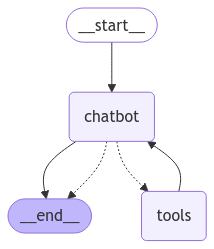

In [61]:
# Dispalying the graph
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [62]:
user_input = "which book is good to understand LLM"

events = graph.stream(
    {'messages':[("user", user_input)]},stream_mode="values"
)
for event in events:
  event['messages'][-1].pretty_print()

ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_community.tools.wikipedia.tool.WikipediaQueryRun'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)
ERROR:langsmith._internal._serde:Failed to use model_dump to serialize <class 'langchain_community.tools.wikipedia.tool.WikipediaQueryRun'> to JSON: PydanticSerializationError(Unable to serialize unknown type: <class 'pydantic._internal._model_construction.ModelMetaclass'>)


================================ Human Message =================================

which book is good to understand LLM


PydanticSerializationError: Unable to serialize unknown type: <class 'module'>